In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .4)

In [3]:
len(X_train), len(X_test)

(90, 60)

In [0]:
def get_distance(a, b):
  
  dist_square = 0
  
  for i in range(len(a)):
    dist_square += (a[i]-b[i])**2
    
  return np.sqrt(dist_square)
    

In [0]:
def KNN(train, test_instance, k):
  
  distances = {}
  sort = {}
  
  for i in range(len(train)):
    
    dist = get_distance(train[i], test_instance)
    distances[i] = dist
    
  
  sorted_dist = sorted(distances.items(), key=operator.itemgetter(1))  
  
  neighbors = []
  
  for i in range(k):
    neighbors.append(sorted_dist[i][0])
    
  classVotes = {}
  
  
  for i in range(len(neighbors)):
        response = Y_train[neighbors[i]]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1  
            
  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
  
  return sortedVotes[0][0]
  

**Using Fixed Value of K**

In [6]:
y_pred = []

k = 3

for i in range(len(X_test)):
  y_pred.append(KNN(X_train, X_test[i], k))
  
print((accuracy_score(y_pred, Y_test))*100)

95.0


**Finding Optimal Value of K**

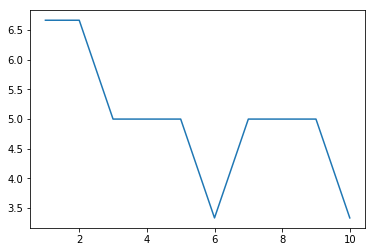

In [7]:
#Iterating k from 1 to 10

results = {}

for k in range(1, 11):
  
  y_pred = []
  for i in range(len(X_test)):
    
    y_pred.append(KNN(X_train, X_test[i], k))
    
  results[k] = (1 - accuracy_score(y_pred, Y_test))*100

#Plotting Error

plt.plot(results.keys(), results.values())

plt.show()